# 决策边界的绘制

## 基本函数

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score 

# sigmoid函数
def sigmoid(t):
    return 1. / (1. + np.exp(-t))

# cost函数
def J(x_b, y, theta):
    y_heat = sigmoid(x_b.dot(theta))
    return -np.sum(y * np.log(y_heat) + (1 - y) * np.log(1 - y_heat)) / len(y)

# 梯度求解
def delta_J(x_b, y, theta):
    return x_b.T.dot(sigmoid(x_b.dot(theta)) - y) / len(y)

# 梯度下降法函数
def gradient_descent(x_b, y, theta_init, eta, iter_times):
    theta = theta_init
    loss_his = []
    
    while iter_times:
        gradient = delta_J(x_b, y, theta)
        theta -= eta * gradient
        loss = J(x_b, y, theta)
        
        loss_his.append(loss)
        iter_times -= 1
    
    return theta, loss_his

# 预测函数
def predict(x, theta):
    x_b = np.hstack([np.ones(shape=(len(x),1)), x])
    predict_prob = sigmoid(x_b.dot(theta))
    return np.array(predict_prob >= 0.5, dtype=int)

def score(y_predict, y_real):
    return accuracy_score(y_real, y_predict)

## 边界绘制函数

In [19]:
from ipykernel import kernelapp as app

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, cmap = custom_cmap, linewidth = 5)

## 使用Knn检测

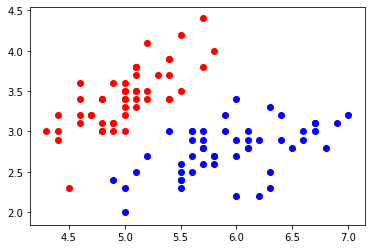

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
x_prime = iris.data
y_prime = iris.target

# 转化为二分类问题对应的数据
x_prime = x_prime[y_prime < 2, :2]
y_prime = y_prime[y_prime < 2]

plt.scatter(x_prime[y_prime==0, 0], x_prime[y_prime==0, 1], color = "red")
plt.scatter(x_prime[y_prime==1, 0], x_prime[y_prime==1, 1], color = "blue")
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x_prime, y_prime, random_state = 666)

knn_clg = KNeighborsClassifier(n_jobs = -1)
knn_clg.fit(x_train, y_train)

In [21]:
knn_clg.score(x_test, y_test)

1.0

## KNN二分类画图

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


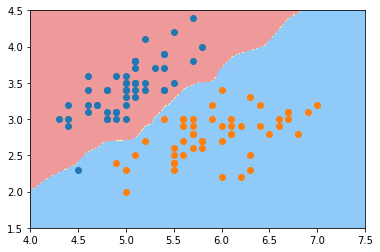

In [22]:
plot_decision_boundary(knn_clg, [4, 7.5, 1.5, 4.5])
plt.scatter(x_prime[y_prime==0, 0], x_prime[y_prime==0, 1])
plt.scatter(x_prime[y_prime==1, 0], x_prime[y_prime==1, 1])
plt.show()

## KNN三分类画图

In [29]:
knn_tree = KNeighborsClassifier(n_jobs=-1, n_neighbors=5)
knn_tree.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


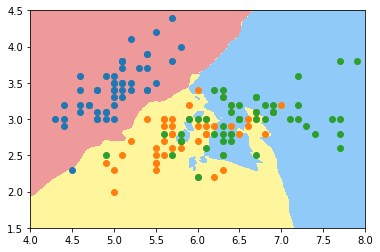

In [30]:
plot_decision_boundary(knn_tree, [4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0, 1])
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1, 1])
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2, 1])
plt.show()

# 总结：
* 1、对于KNN算法，k越大模型复杂度越小
* 2、 模型越复杂，分类边界越复杂